# The very first Virtual Rat RNN

In [205]:
import numpy as np
import matplotlib.pyplot as plt

from RNN import FirstRNN
from VirtualRatFunctions import *
from RNN_solver import RNNsolver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded defaults from ~/.dbconf
Z009 (10443, 6)


In [206]:
preprocessedData = preProcess(allRatsData,ratnames=["Z009"])

In [207]:
RNNs = {}
solvers = []
choices = {}
probabilities = {}
logical_accuracies = {}
real_accuracies = {}
learning_rates = 10.0 ** np.arange(-5,3,0.2)
#learning_rates = [1e-3]
for lr in learning_rates:
    print lr
    for ratname in preprocessedData.keys():
        print ratname
        ratData = preprocessedData[ratname]
        RNN = FirstRNN(hidden_dim = 5)
        RNNs[ratname] = RNN
        solver = RNNsolver(RNN, ratData['trainX'], ratData['trainY'],
                           update_rule='adam',
                           optim_config={'learning_rate': lr,
                       }, num_epochs = 300,
                           lr_decay = 1,
                           verbose = True)
        #solvers[ratname] = solver
        solvers.append(solver)
        solver.train()
        choice, probs = RNN.predict(ratData['valX'])
        probabilities[ratname] = probs
        choices[ratname] = choice
        acc = np.mean(choice == ratData['valTrueY'])
        accReal = np.mean(choice == ratData['valY'])
        logical_accuracies[ratname] = acc
        real_accuracies[ratname] = accReal
        print "Logical accuracy: %s, Real sequence accuracy: %s" % (acc, accReal)

1e-05
Z009
(Iteration 1 / 300) loss: 9846.719577, average loss: 1.178683
(Iteration 11 / 300) loss: 9844.918247, average loss: 1.178468
(Iteration 21 / 300) loss: 9843.119197, average loss: 1.178252
(Iteration 31 / 300) loss: 9841.321938, average loss: 1.178037
(Iteration 41 / 300) loss: 9839.526454, average loss: 1.177822
(Iteration 51 / 300) loss: 9837.733102, average loss: 1.177608
(Iteration 61 / 300) loss: 9835.942062, average loss: 1.177393
(Iteration 71 / 300) loss: 9834.153292, average loss: 1.177179
(Iteration 81 / 300) loss: 9832.366202, average loss: 1.176965
(Iteration 91 / 300) loss: 9830.581034, average loss: 1.176751
(Iteration 101 / 300) loss: 9828.797962, average loss: 1.176538
(Iteration 111 / 300) loss: 9827.016872, average loss: 1.176325
(Iteration 121 / 300) loss: 9825.237400, average loss: 1.176112
(Iteration 131 / 300) loss: 9823.460273, average loss: 1.175899
(Iteration 141 / 300) loss: 9821.684806, average loss: 1.175686
(Iteration 151 / 300) loss: 9819.911252,

VirtualRatFunctions.py:622: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(mask_flat * np.log(probs[np.arange(N * T), y_flat])) / N


(Iteration 11 / 300) loss: 586639.967985, average loss: 70.222644
(Iteration 21 / 300) loss: inf, average loss: inf
(Iteration 31 / 300) loss: inf, average loss: inf
(Iteration 41 / 300) loss: inf, average loss: inf
(Iteration 51 / 300) loss: inf, average loss: inf
(Iteration 61 / 300) loss: inf, average loss: inf
(Iteration 71 / 300) loss: inf, average loss: inf
(Iteration 81 / 300) loss: inf, average loss: inf
(Iteration 91 / 300) loss: inf, average loss: inf
(Iteration 101 / 300) loss: inf, average loss: inf
(Iteration 111 / 300) loss: inf, average loss: inf
(Iteration 121 / 300) loss: inf, average loss: inf
(Iteration 131 / 300) loss: inf, average loss: inf
(Iteration 141 / 300) loss: inf, average loss: inf
(Iteration 151 / 300) loss: inf, average loss: inf
(Iteration 161 / 300) loss: 730672.567362, average loss: 87.463798
(Iteration 171 / 300) loss: inf, average loss: inf
(Iteration 181 / 300) loss: inf, average loss: inf
(Iteration 191 / 300) loss: inf, average loss: inf
(Iterati

RNN.py:122: RuntimeWarning: overflow encountered in exp
  p = np.exp(scores)/np.sum(np.exp(scores))
RNN.py:122: RuntimeWarning: invalid value encountered in divide
  p = np.exp(scores)/np.sum(np.exp(scores))


Logical accuracy: 0.00095785440613, Real sequence accuracy: 0.409003831418
251.188643151
Z009
(Iteration 1 / 300) loss: 9562.469287, average loss: 1.144658
(Iteration 11 / 300) loss: inf, average loss: inf
(Iteration 21 / 300) loss: inf, average loss: inf
(Iteration 31 / 300) loss: inf, average loss: inf
(Iteration 41 / 300) loss: inf, average loss: inf
(Iteration 51 / 300) loss: inf, average loss: inf
(Iteration 61 / 300) loss: inf, average loss: inf
(Iteration 71 / 300) loss: inf, average loss: inf
(Iteration 81 / 300) loss: inf, average loss: inf
(Iteration 91 / 300) loss: inf, average loss: inf
(Iteration 101 / 300) loss: inf, average loss: inf
(Iteration 111 / 300) loss: 1299965.899453, average loss: 155.609995
(Iteration 121 / 300) loss: 1794626.627802, average loss: 214.822436
(Iteration 131 / 300) loss: 1522268.454754, average loss: 182.220308
(Iteration 141 / 300) loss: 1339221.679577, average loss: 160.309035
(Iteration 151 / 300) loss: 748130.997215, average loss: 89.553627


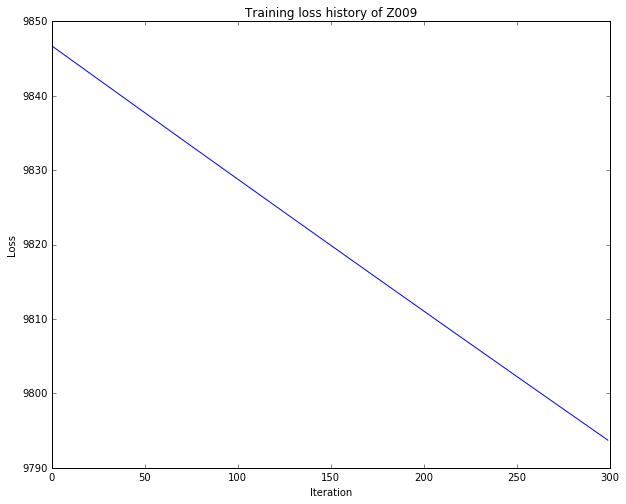

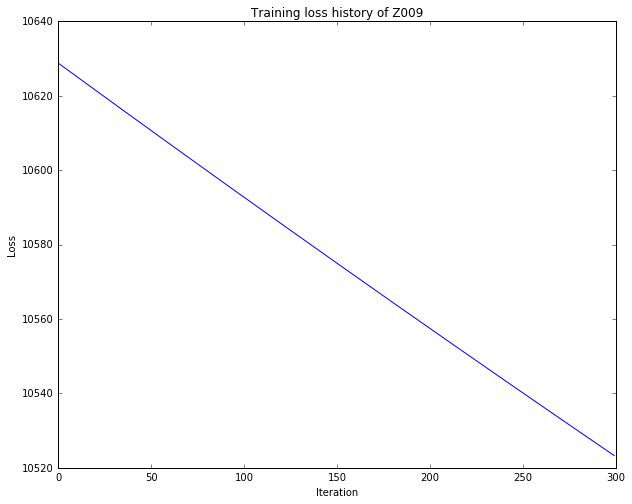

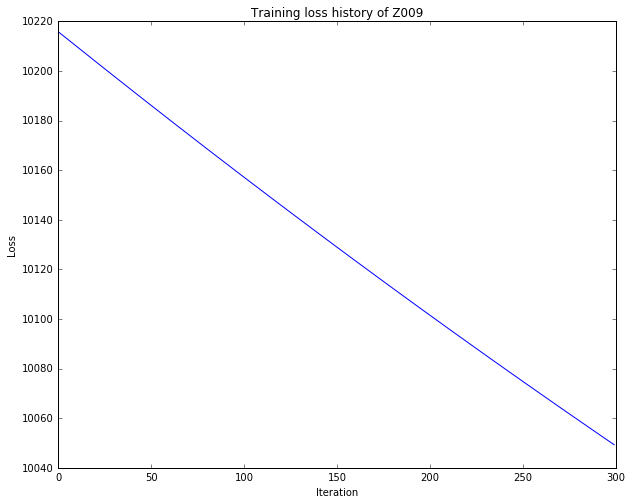

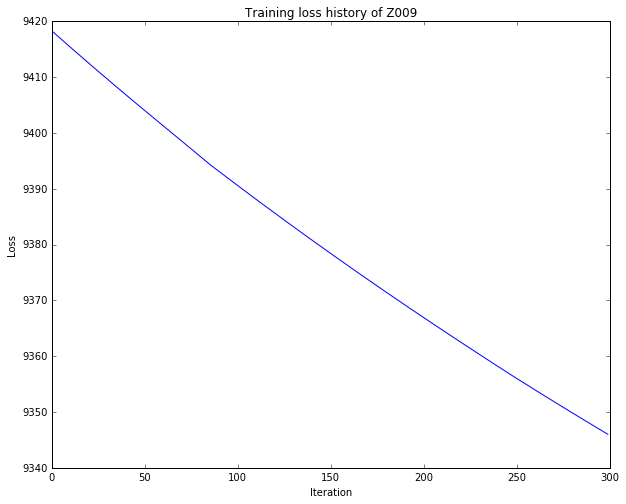

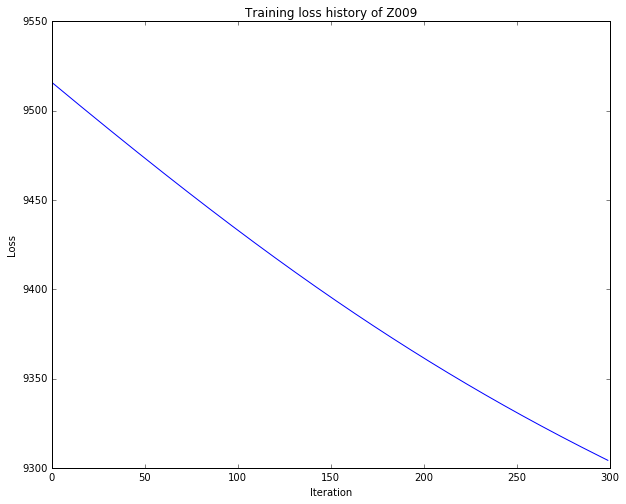

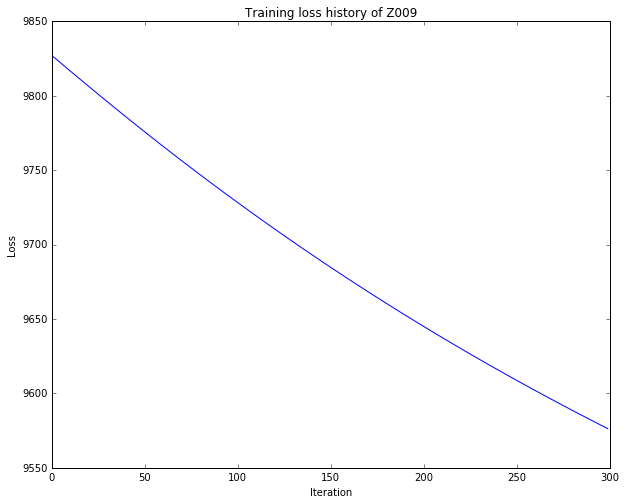

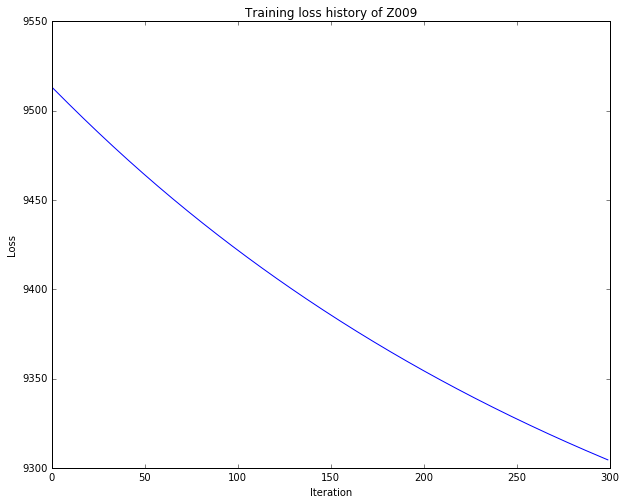

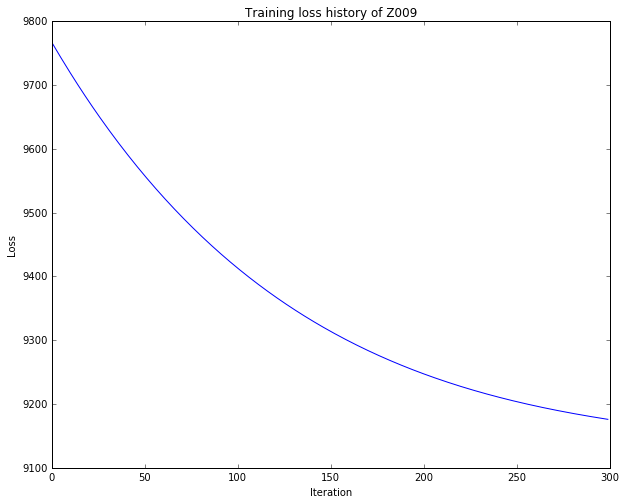

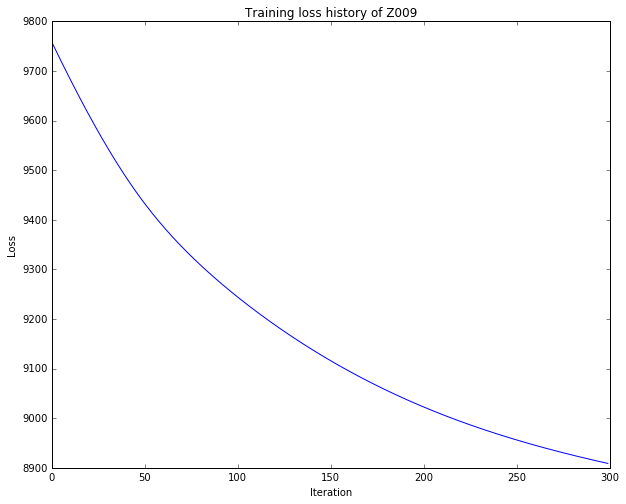

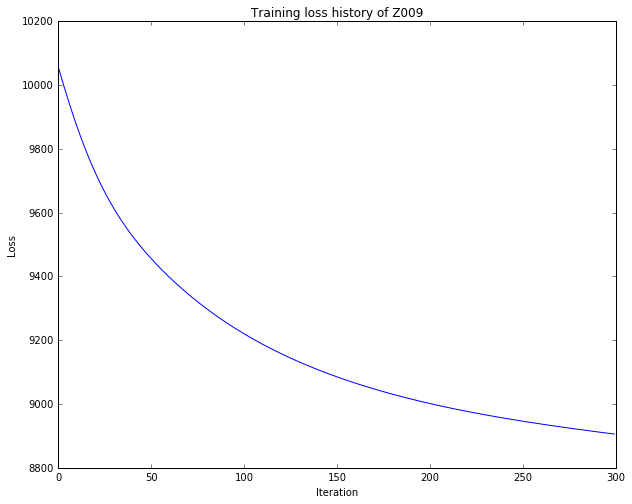

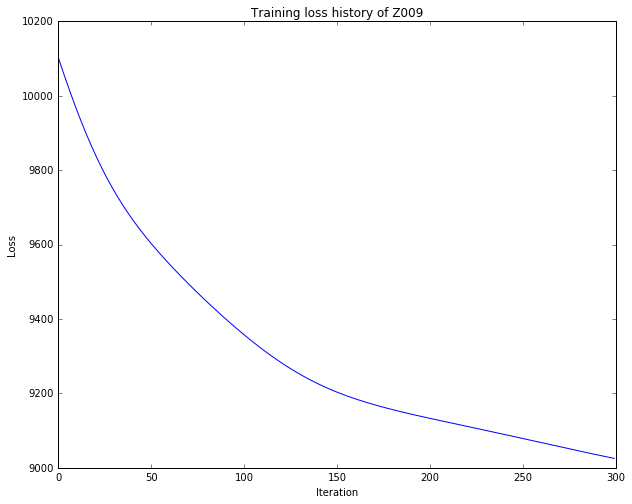

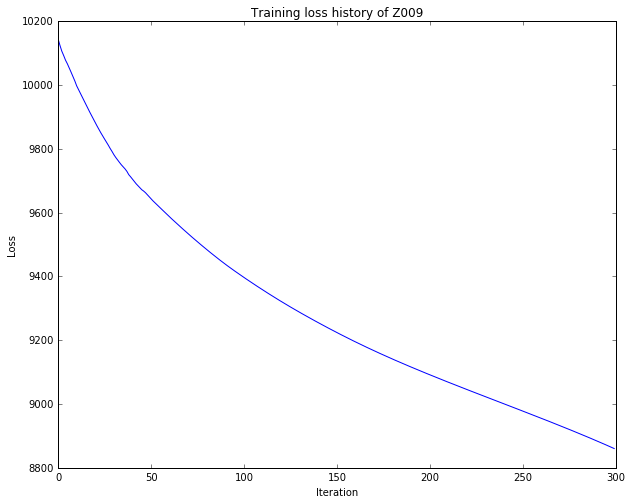

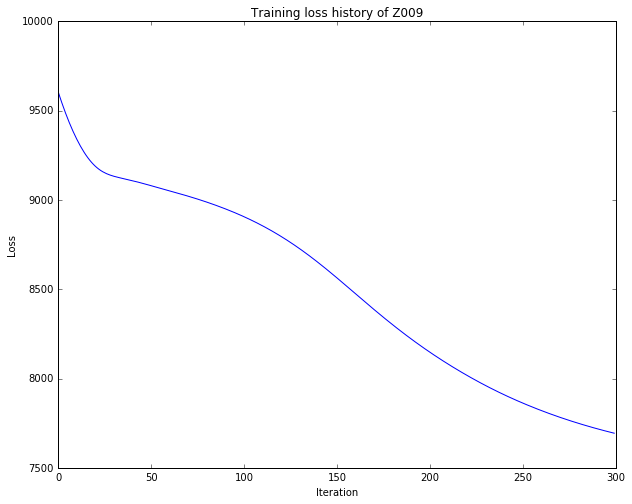

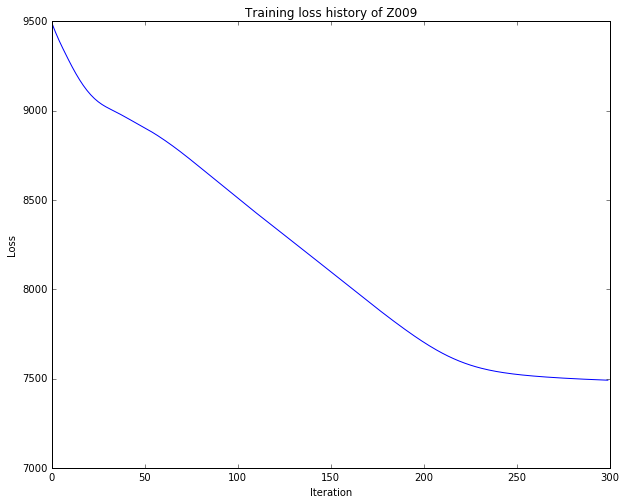

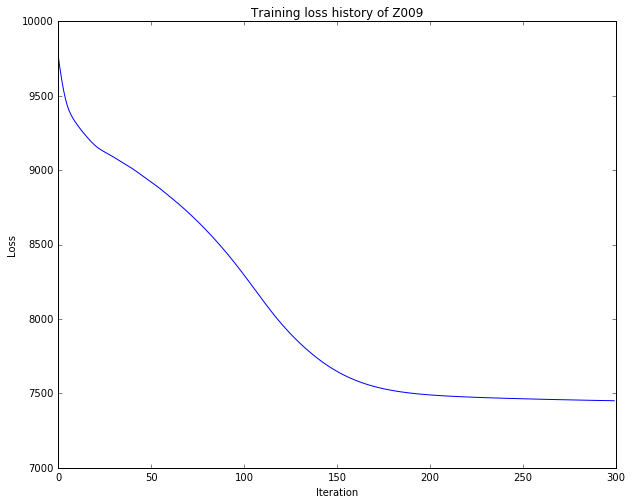

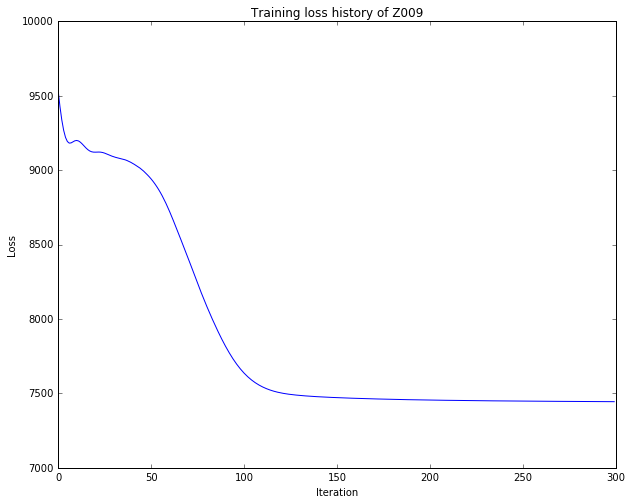

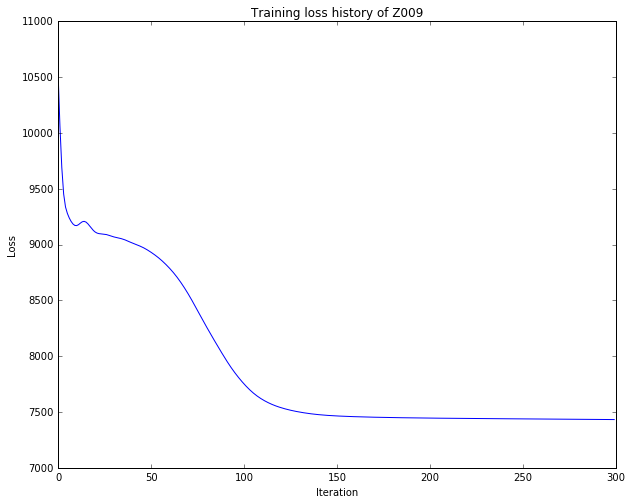

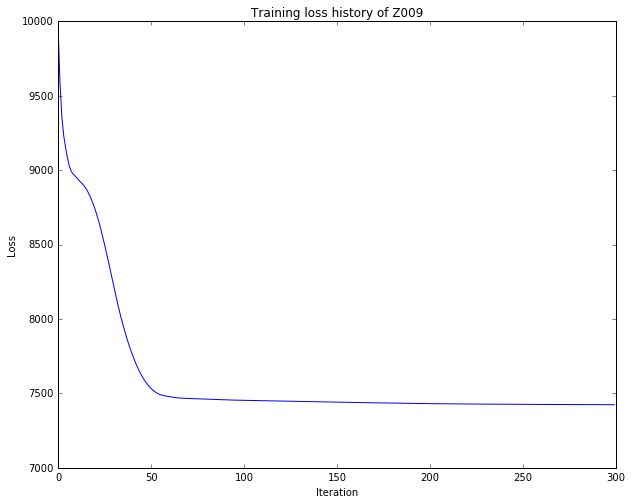

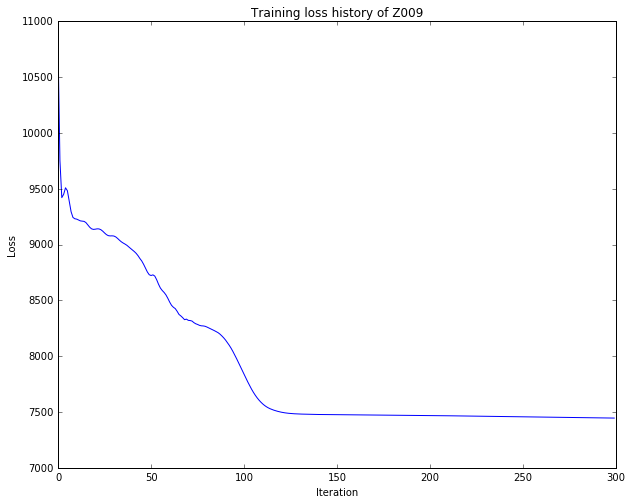

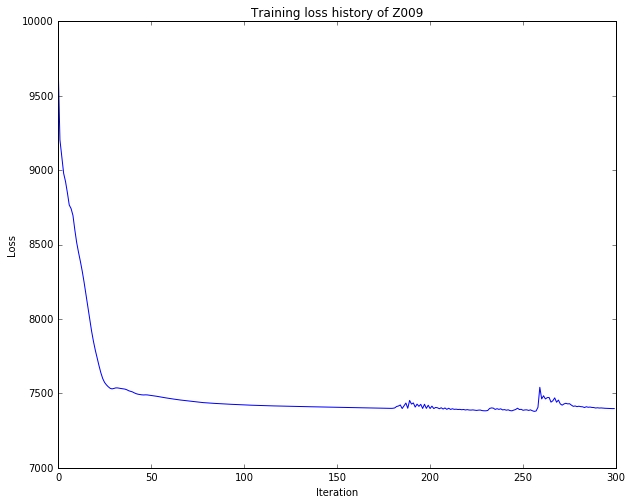

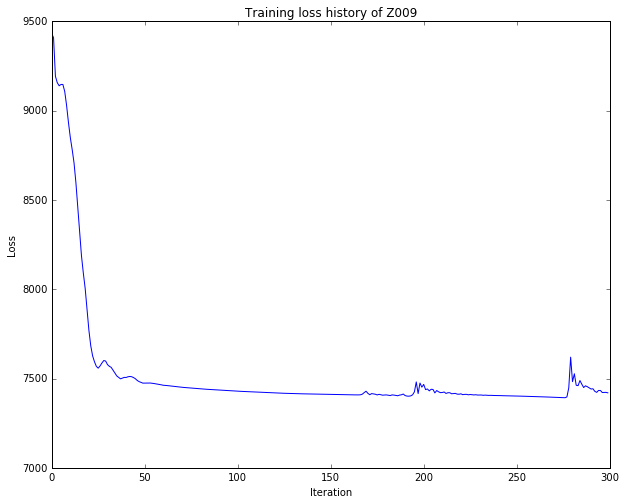

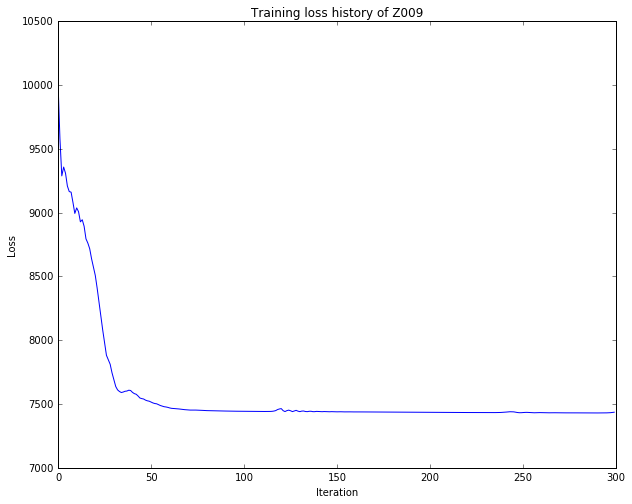

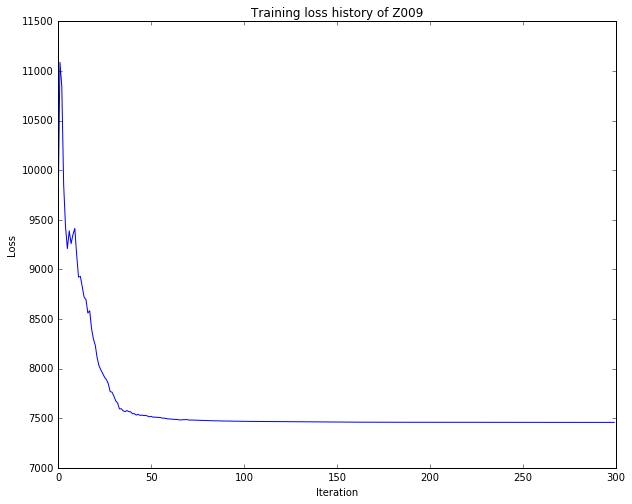

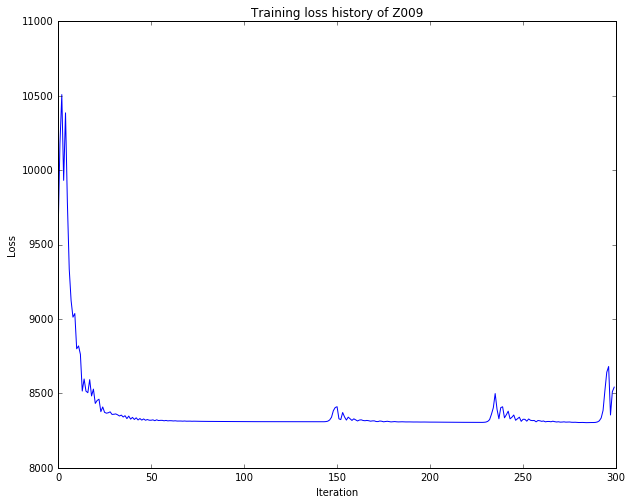

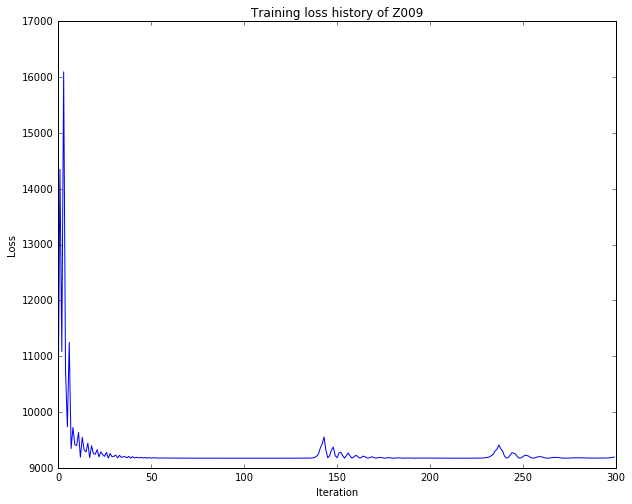

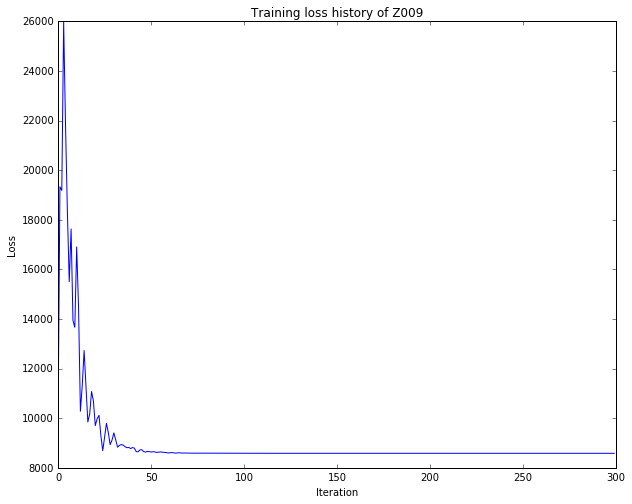

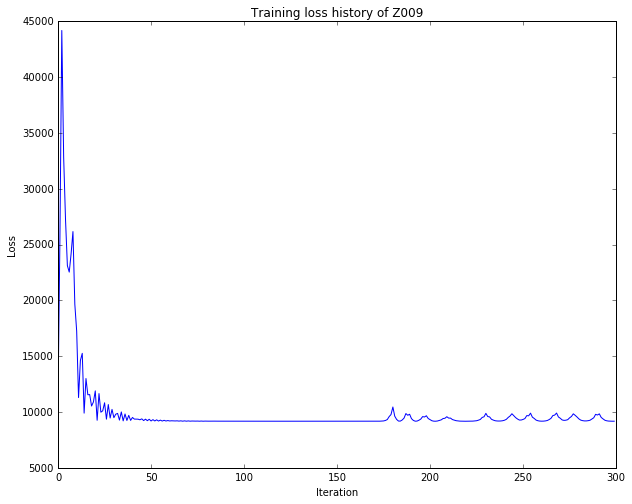

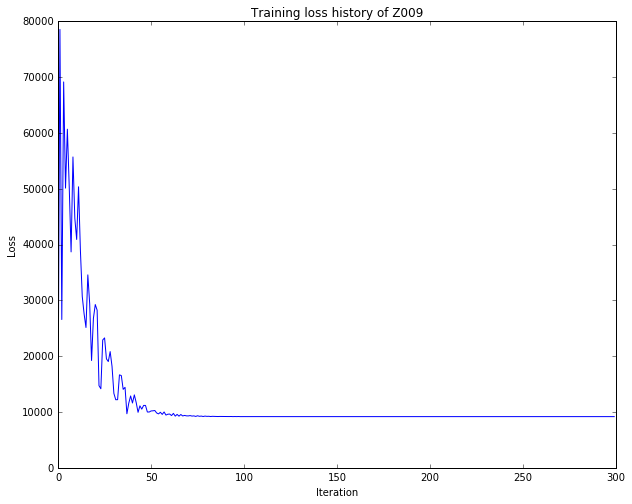

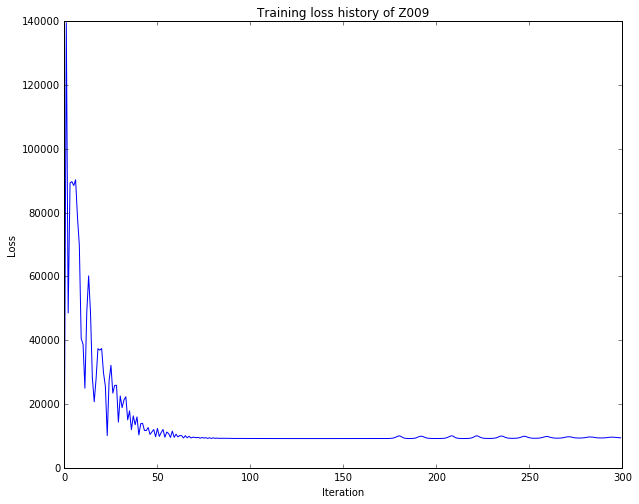

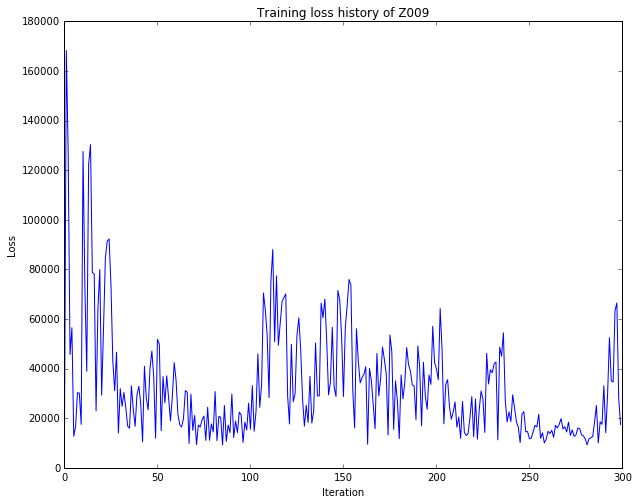

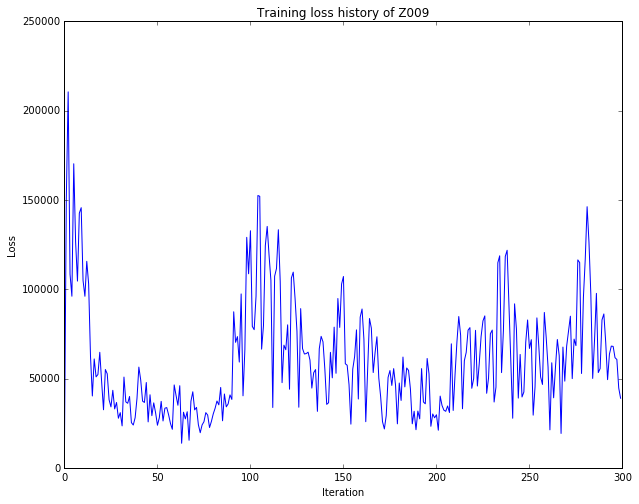

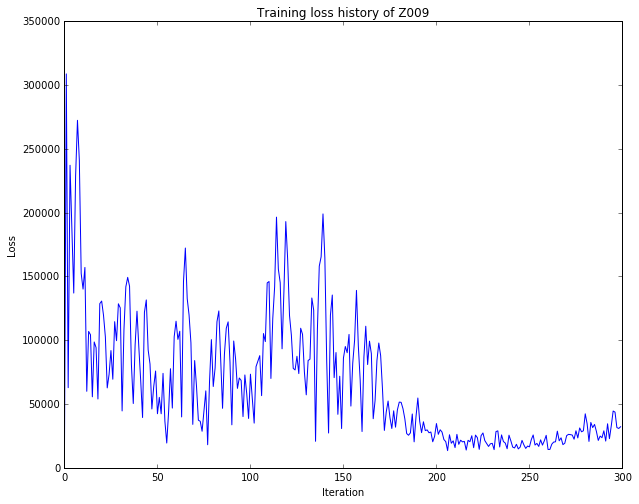

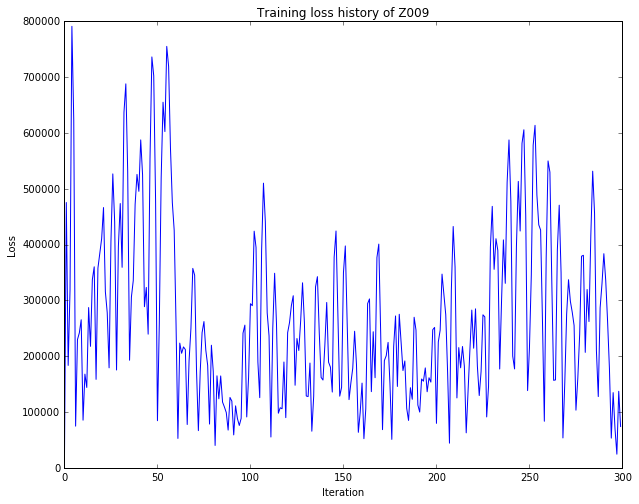

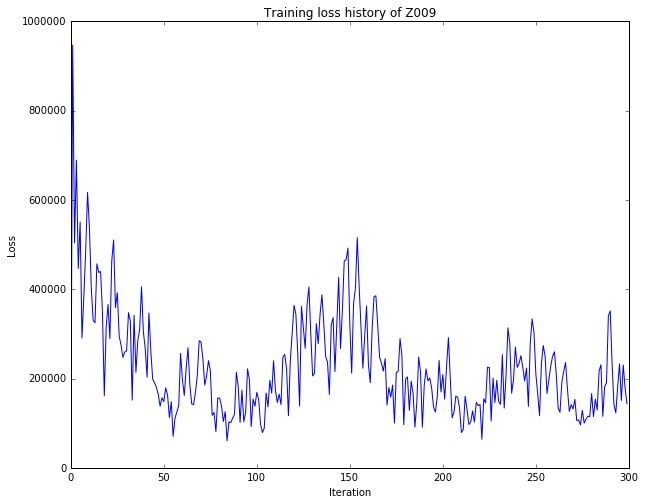

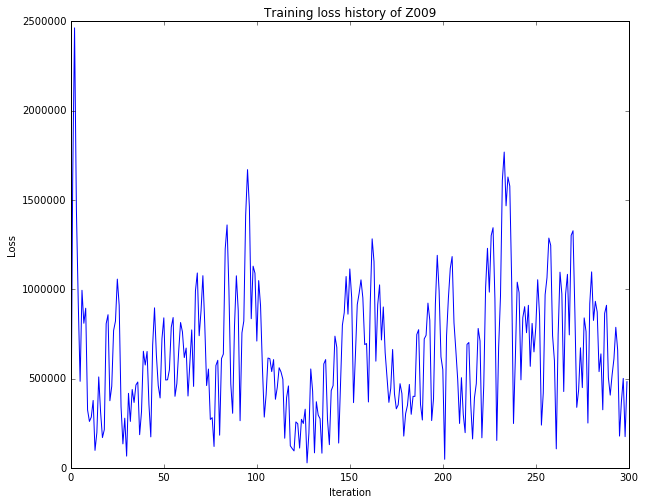

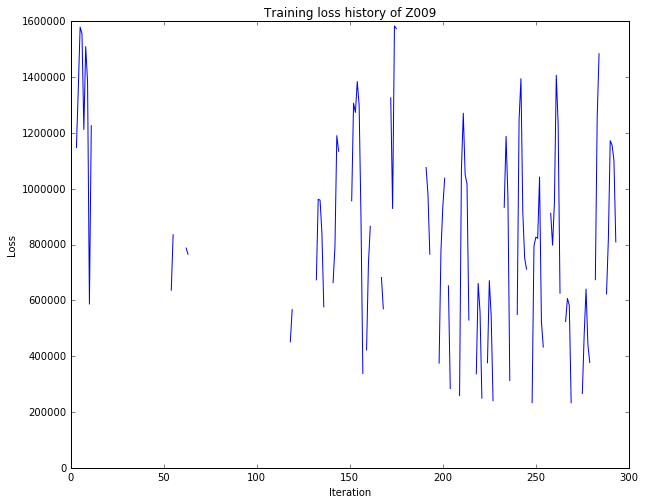

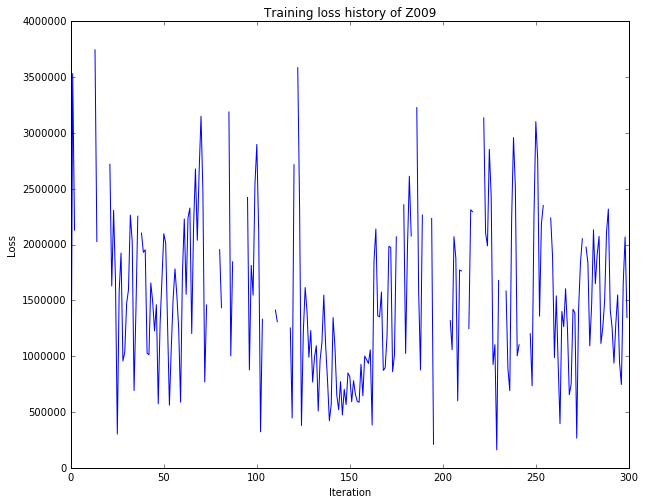

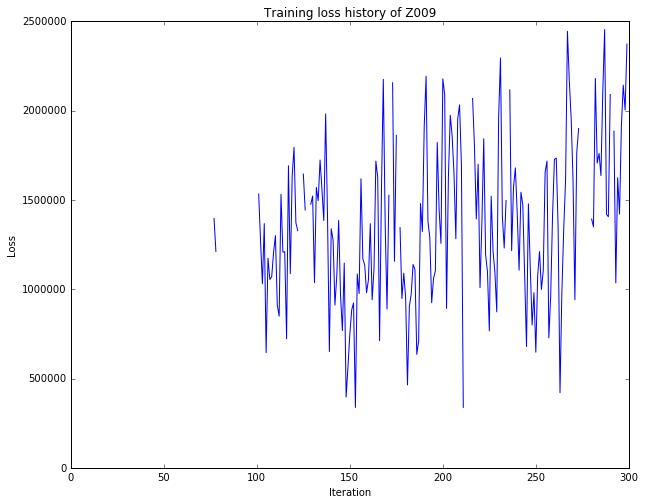

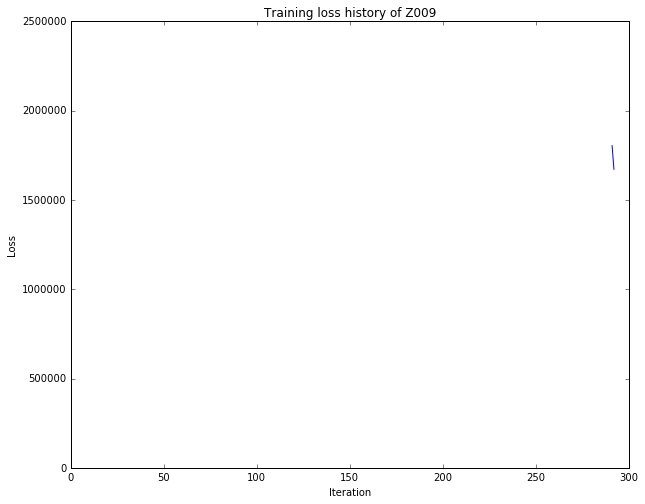

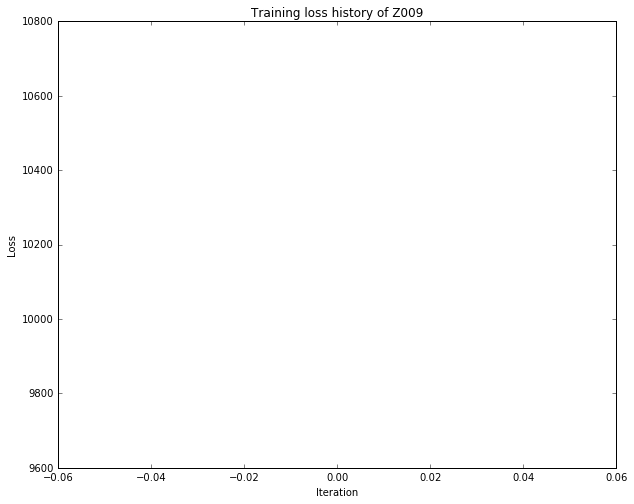

In [208]:
# Plot the training losses
for solver in solvers:
    plt.plot(solver.loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history of '+ ratname)
    plt.show()

In [209]:
# Plot the training losses
#for ratname in solvers.keys():
#    plt.plot(solvers[ratname].loss_history)
#    plt.xlabel('Iteration')
#    plt.ylabel('Loss')
#    plt.title('Training loss history of '+ ratname)
#    plt.show()

In [210]:
trial_window = 3
postData = postProcess(choices, probabilities, preprocessedData,trial_window=trial_window)
p2a, a2p, p2a2, a2p2 = meanPerformance(postData) 
real_p2a, real_a2p, normalized_real_rat = realRatMeanPerformance(preprocessedData) 

In [211]:
for ratname in normalized_real_rat.keys():
    print "%s rat: %f, logical: %f, sequencial: %f" % (ratname,normalized_real_rat[ratname]['normalized_accuracy'],
                                                      logical_accuracies[ratname], real_accuracies[ratname])

Z009 rat: 0.841029, logical: 0.500958, sequencial: 0.330460


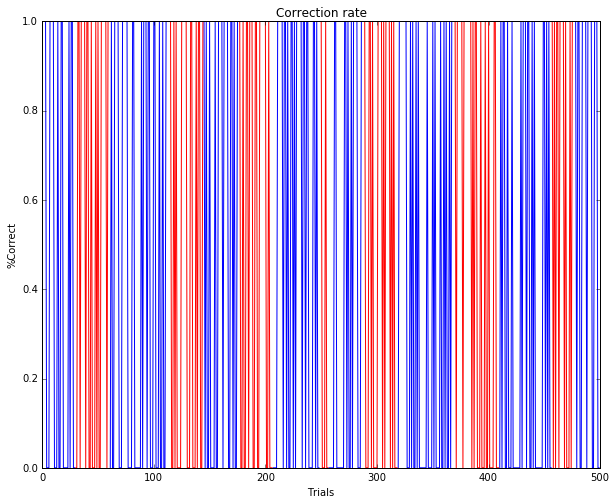

In [212]:
for ratname in postData:
    plt.plot(range(500), postData[ratname]['pro_prob'][:500],color='b')
    plt.plot(range(500), postData[ratname]['anti_prob'][:500],color='r')
    plt.xlabel('Trials')
    plt.ylabel('%Correct')
    plt.title('Correction rate')
    plt.show()

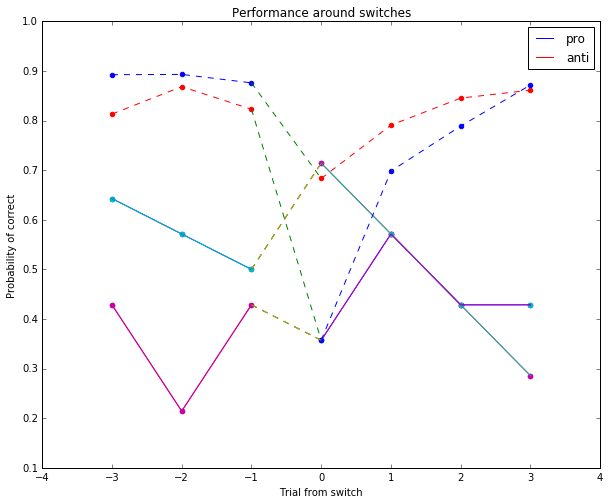

In [213]:
# Plot for normalization
p2aplot, = plt.plot(range(-trial_window, 0), p2a[:trial_window], color='b')
a2pplot, = plt.plot(range(-trial_window, 0), a2p[:trial_window], color='r')
plt.plot(range(trial_window+1), p2a[trial_window:], color='r')
plt.plot(range(trial_window+1), a2p[trial_window:], color='b')
plt.plot([-1,0],p2a[trial_window - 1:trial_window + 1],'k--')
plt.plot([-1,0],a2p[trial_window - 1:trial_window + 1],'k--')
plt.scatter(range(-trial_window, 0), p2a[:trial_window], color='b')
plt.scatter(range(-trial_window, 0), a2p[:trial_window], color='r')
plt.scatter(range(trial_window+1), p2a[trial_window:], color='r')
plt.scatter(range(trial_window+1), a2p[trial_window:], color='b')

# Plot for excluding cpv
plt.plot(range(-trial_window, 0), p2a2[:trial_window], color='c')
plt.plot(range(-trial_window, 0), a2p2[:trial_window], color='m')
plt.plot(range(trial_window+1), p2a2[trial_window:], color='c')
plt.plot(range(trial_window+1), a2p2[trial_window:], color='m')
plt.plot([-1,0],p2a2[trial_window - 1:trial_window + 1],'y--')
plt.plot([-1,0],a2p2[trial_window - 1:trial_window + 1],'y--')
plt.scatter(range(-trial_window, 0), p2a2[:trial_window], color='c')
plt.scatter(range(-trial_window, 0), a2p2[:trial_window], color='m')
plt.scatter(range(trial_window+1), p2a2[trial_window:], color='m')
plt.scatter(range(trial_window+1), a2p2[trial_window:], color='c')

realp2aplot = plt.plot(range(-trial_window, 0), real_p2a[:trial_window], 'b--')
reala2pplot = plt.plot(range(-trial_window, 0), real_a2p[:trial_window], 'r--')
plt.plot(range(trial_window+1), real_p2a[trial_window:], 'r--')
plt.plot(range(trial_window+1), real_a2p[trial_window:], 'b--')
plt.plot([-1,0],real_p2a[trial_window - 1:trial_window + 1],'g--')
plt.plot([-1,0],real_a2p[trial_window - 1:trial_window + 1],'g--')
plt.scatter(range(-trial_window, 0), real_p2a[:trial_window], color='b')
plt.scatter(range(-trial_window, 0), real_a2p[:trial_window], color='r')
plt.scatter(range(trial_window+1), real_p2a[trial_window:], color='r')
plt.scatter(range(trial_window+1), real_a2p[trial_window:], color='b')

plt.legend([p2aplot, a2pplot],["pro","anti"])
plt.xlabel('Trial from switch')
plt.ylabel('Probability of correct')
plt.title('Performance around switches')
plt.show()

In [214]:
#uploadRNN(solvers['Z009'], 'Z009', "High acc but no switch cost feature", None, 5e-5, 4, 0.993295019157)